In [97]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set_palette("Set2")

%matplotlib inline



Пусть нам попались какие-то данные.

В данном случае - 100 различных значений какой-то величины.

In [98]:
size = 100
sample = sps.norm.rvs(size=size) #генерируем реализацию выборки из стандартного нормального распределения

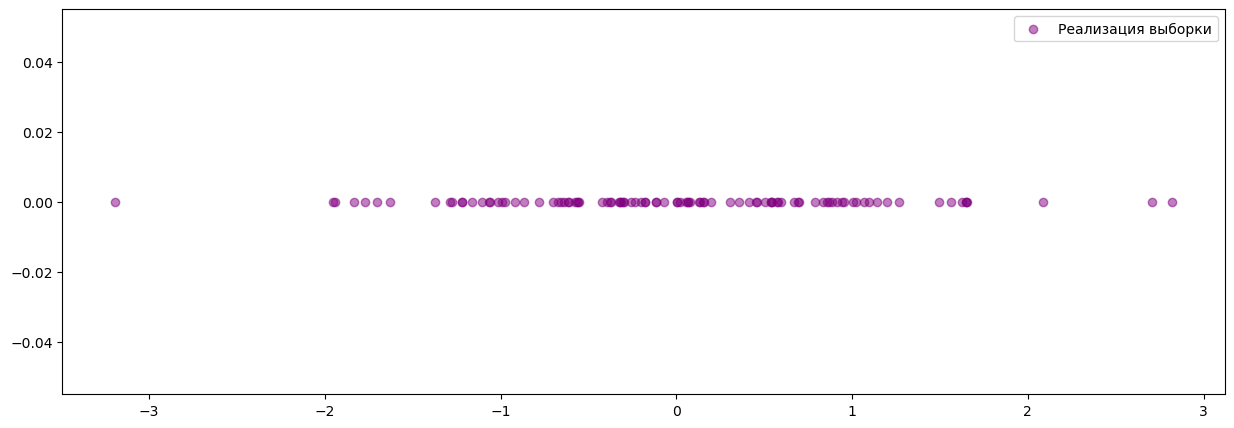

In [99]:
# рисуем график
# по оси x - значения реализаций случайной величины

plt.figure(figsize=(15, 5))
plt.scatter(sample, np.zeros(size), alpha=0.5, color='purple', label="Реализация выборки")
plt.legend()
plt.show()

Для начала давайте попробуем прикинуть, как распределены данные:

## Гистограмма

Идея: разделим всю числовую прямую на несколько "корзин" и посмотрим, сколько объектов попало в каждую.

Формально: $X_1, \ldots X_n$ - выборка.

$-\infty = a_0 < \ldots < a_i < \ldots < a_{m} = +\infty$ - разбиение на $m$ корзин.

$n_k = \sum \limits_{i=0}^{n-1} I(X_i \in [a_k, a_{k+1}])$ - количество элементов в $i$-й корзине.


Можно построить график в виде столбиков, где высота столбика показывает, сколько объектов попало в соответствующую корзину.

Этот график по форме похож на график плотности распределения нашей случайной величины.



Гистограмму можно построить с помощью библиотеки matplotlib.

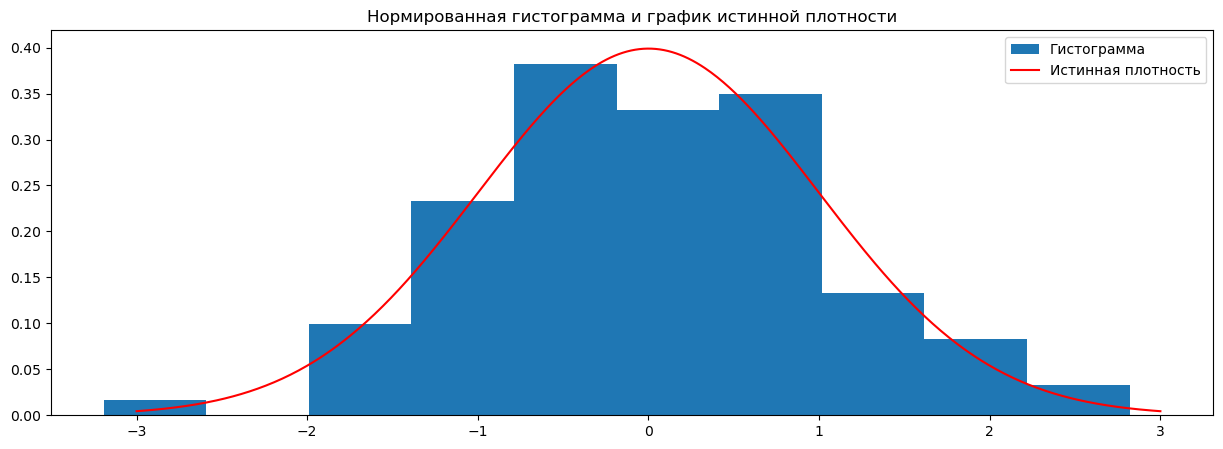

In [100]:
plt.figure(figsize=(15, 5))

plt.title("Нормированная гистограмма и график истинной плотности")

plt.hist(x=sample, bins = 10, density=True, label = "Гистограмма") 
#x - данные, bins - количество корзин, density - нормируем, так что сумма высот столбиков равна 1

grid = np.linspace(-3, 3, 500)

plt.plot(grid, sps.norm.pdf(grid), color='red', label='Истинная плотность')

plt.legend()

plt.show()

Другой способ:

Для построения гистограммы удобно использовать библиотеку seaborn (подробнее - в туториалах).

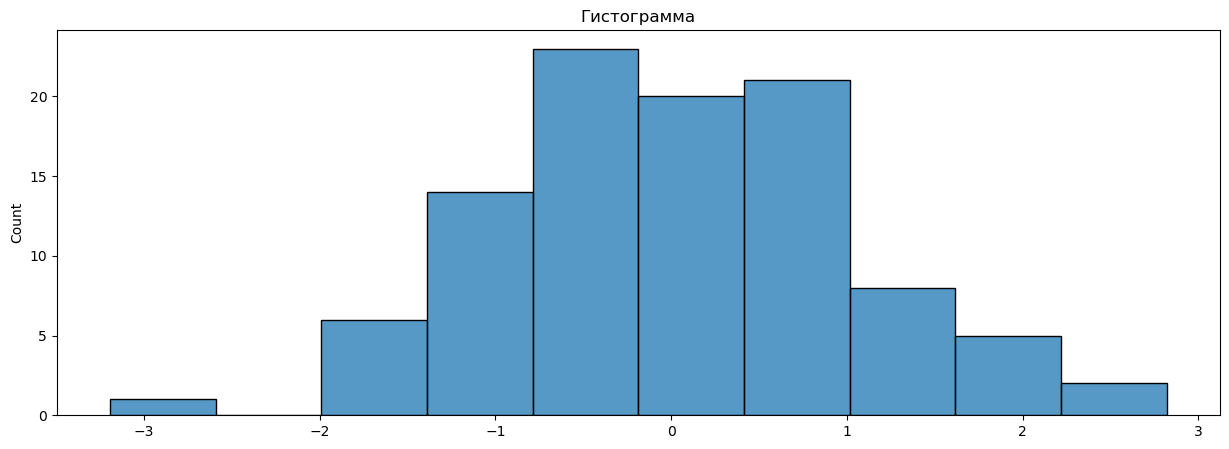

In [101]:
plt.figure(figsize=(15, 5))

plt.title("Гистограмма")

sns.histplot(data=sample, bins = 10)
#data - наши данные, bins - количество корзин

plt.show()

Посмотрим, на что влияет количество корзин.

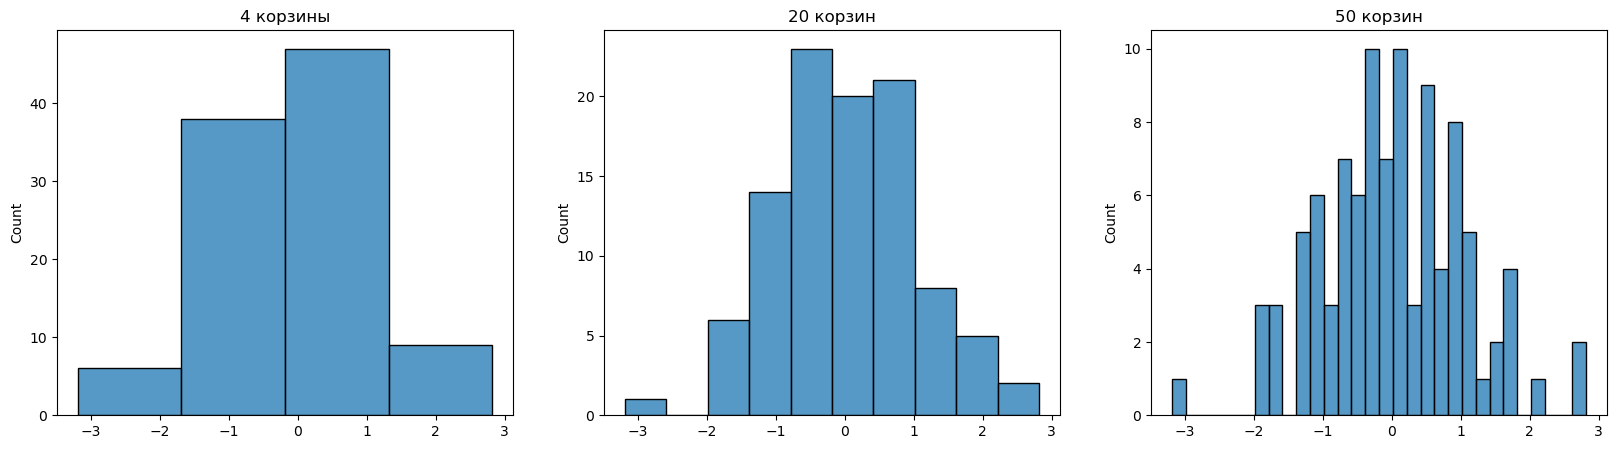

In [102]:
fig, axs = plt.subplots(figsize=(20, 5), ncols=3)

axs[0].set_title("4 корзины" )
axs[1].set_title("20 корзин" )
axs[2].set_title("50 корзин" )


sns.histplot(data=sample, bins = 4, ax=axs[0])
sns.histplot(data=sample, bins = 10, ax=axs[1])
sns.histplot(data=sample, bins = 30, ax=axs[2])


#data - наши данные, bins - количество корзин

plt.show()

## Задание 1
Рассмотрим функцию `np.random.randint()`.

Выберите любые значения a и b и создайте массив рандомных чисел от a до b (размер массива 100).

In [103]:
size = 100
arr = np.random.randint(0,100,size)
arr

array([97, 57, 34, 38, 10, 80, 99, 14,  1, 28, 63, 61, 98, 56, 95, 64, 25,
       58, 88,  3, 21, 58, 47, 27, 20, 53, 83, 71, 96, 32, 78,  8,  3, 39,
       73, 90,  3,  7, 13, 35, 48, 88, 98, 84, 96, 44, 15, 52, 62, 71,  4,
       57, 54, 36, 67, 18, 58, 74, 37, 56,  5, 18,  8, 23, 94, 90, 37, 57,
       61, 73, 18, 28, 33, 69, 85, 67, 11, 38, 99, 64, 35, 56, 41, 47, 69,
       62, 48, 73, 90, 80, 51, 72, 86,  7, 28, 51, 48, 45, 69, 86])

Постройте гистограмму для этого массива.

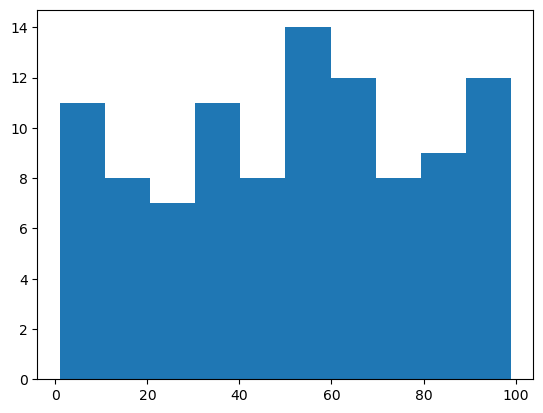

In [104]:
plt.hist(arr);

Постройте более четкий график, увеличив параметр `bins`.

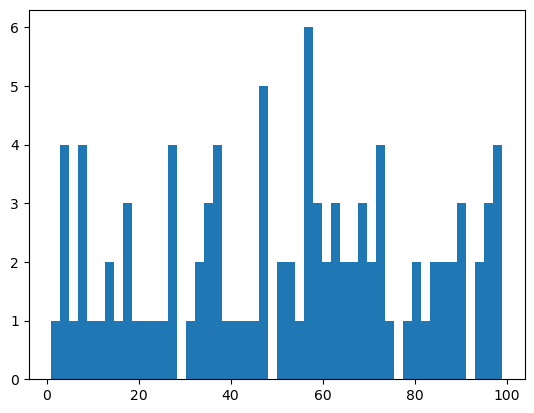

In [105]:
plt.hist(arr,bins = 50);

# Создайте массив sizes, который будет сосстоять из 1e2, 1e3, 1e4, 1e5 (используйте `np.logspace()`). Числа должны быть целыми.

In [106]:
sizes = np.logspace(2,5,4, dtype = int)
sizes

array([   100,   1000,  10000, 100000])

Постройте plt.subplots в виде строки из 4 графиков. Параметр `bins` укажите 100. На каждом графике отрисуйте гистограмму массива заданного размера из массива sizes. Подпишите, какой размер массивы к какому графику относится.

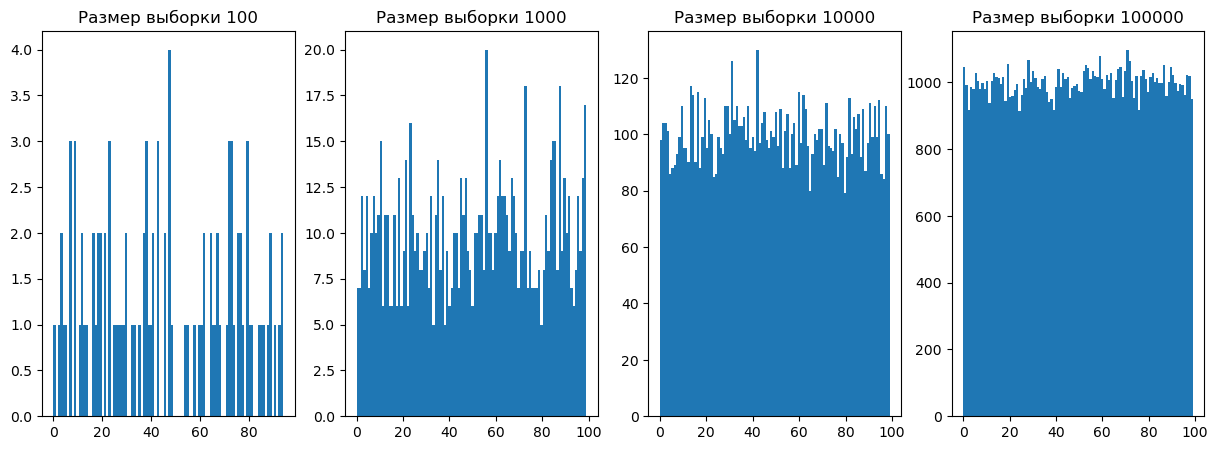

In [107]:
fid,ax = plt.subplots(1,4, figsize = (15,5))
for i in range(4):
    arr = np.random.randint(0,100,sizes[i])
    ax[i].hist(arr, bins = 100)
    ax[i].set_title('Размер выборки {}'.format(sizes[i]))

На какое распределение похоже?

Равномерное

## Задание 2*
Напишите собственную реализацию нормального распределения. Создайте класс и определите в нем функцию _pdf. Напомню, что плотность нормального распределения расчитывается следующим образом:
$$ \frac{1}{\sigma \sqrt{2 \pi}} exp \left( -\frac{(x-\mu)^2}{2 \sigma ^2}\right)$$
Для построения функции возьмите $\mu$ = 0, $\sigma$ = 1


In [108]:
class NormDist:
    def _pdf(x):
        return 1/np.sqrt(2*np.pi)*np.exp(-(x+0)**2/2)
    print(_pdf(0))


0.3989422804014327


Сгенерируйте выборку из 2000 элементов. Засеките время генерации выборки.

In [109]:
import time
start = time.time()
size = 2000
sample = np.zeros(size)
i = 0
while i < size:
    x = 20*(np.random.random()-0.5) # генерация случайного числа от -10 до 10
    u = np.random.random()
    if NormDist._pdf(x) > u:       
        sample[i] = x
        i += 1
end = time.time()
delta_t1 = (end- start)*10**3
print(delta_t1,"ms")
print('Мат ожидание:',sample.sum() / size,'\nДисперсия: ', np.var(sample))

197.77274131774902 ms
Мат ожидание: -0.017103895555799626 
Дисперсия:  0.9736969996351296


Постройте гистограмму для вашей выборки

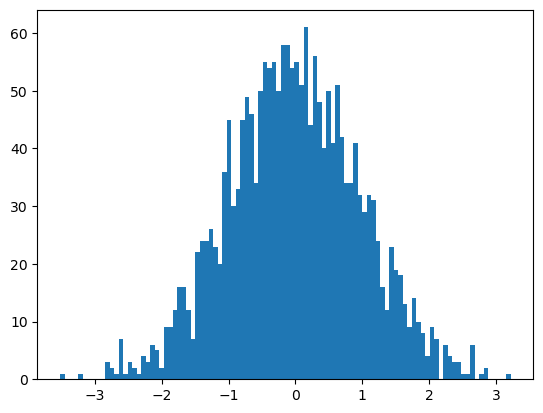

In [110]:
plt.hist(sample, bins = 100);

Сравните время работы вашей реализации и реализации из `scipy.stats`

разнось времён:  196.7763900756836 ms
Мат ожидание: -0.02227071321250782 
Дисперсия:  0.9736969996351296


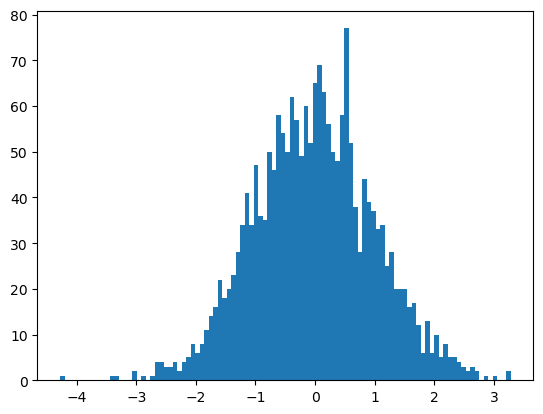

In [111]:
start = time.time()
sample0 = sps.norm.rvs(size=2000, loc=0, scale=1)
end = time.time()
delta_t2 = (end- start)*10**3
print("разнось времён: ", delta_t1-delta_t2,"ms")
print('Мат ожидание:',sample0.sum() / size,'\nДисперсия: ', np.var(sample))
plt.hist(sample0, bins = 100);

Как, используя вашу функцию, можно создавать выборки для других значений $\mu$ и $\sigma$? Проиллюстрируйте.

Мат ожидание: 9.9315844177768 
Дисперсия:  15.579151994162073


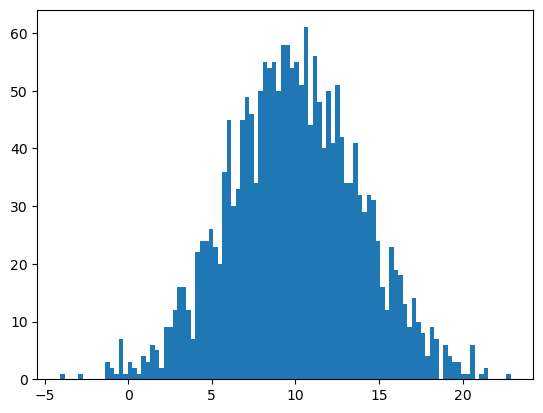

In [112]:
a = 10
sigma = 4
sample2 = a + sigma*sample
plt.hist(sample2, bins = 100);
print('Мат ожидание:',sample2.sum() / size,'\nДисперсия: ', np.var(sample2))

## Ядерная оценка плотности

KDE (kernel density estimation) - непараметричсекий способ оценивания случайной величины.

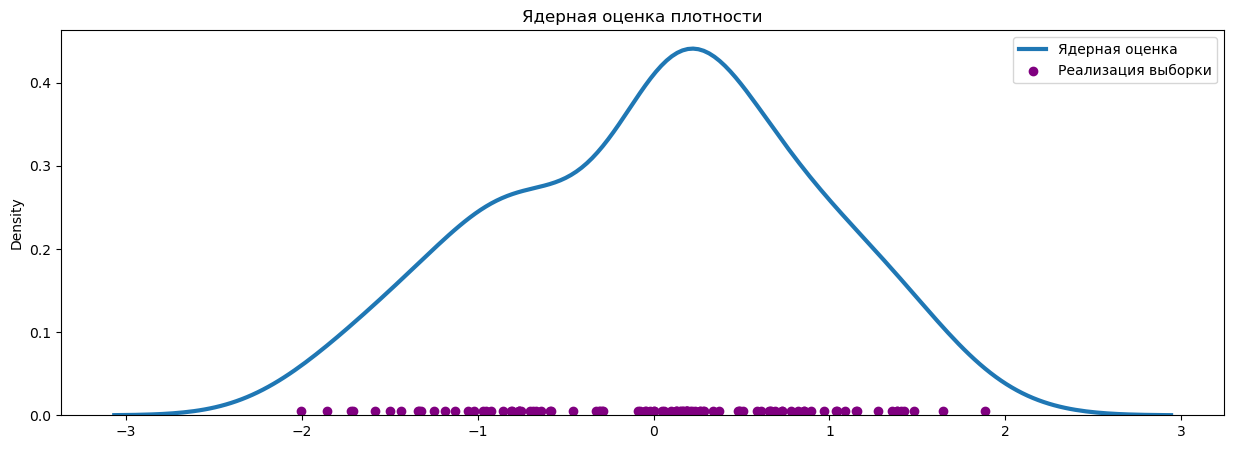

In [113]:
plt.figure(figsize=(15, 5))

plt.title("Ядерная оценка плотности")
size = 100
sample = sps.norm.rvs(size=size)
sns.kdeplot(data=sample, lw=3, label="Ядерная оценка")

plt.scatter(sample, np.zeros(size)+0.005, color='purple', label='Реализация выборки')

plt.legend()
plt.show()


Сравним график ядерной оценки с графиком истинной плотности.

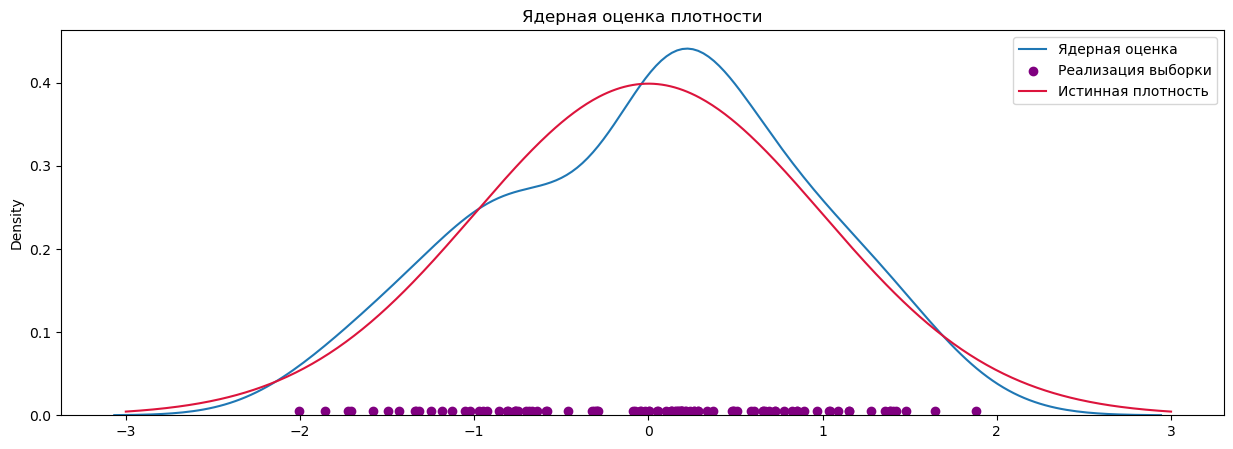

In [114]:
plt.figure(figsize=(15, 5))

plt.title("Ядерная оценка плотности")

sns.kdeplot(data=sample, label="Ядерная оценка")

plt.scatter(sample, np.zeros(size)+0.005, color='purple', label='Реализация выборки')

plt.plot(grid, sps.norm.pdf(grid), color='crimson', label='Истинная плотность')


plt.legend()
plt.show()

Также метод histplot позволяет сразу строить и гистограмму, и ядерную оценку плотности.

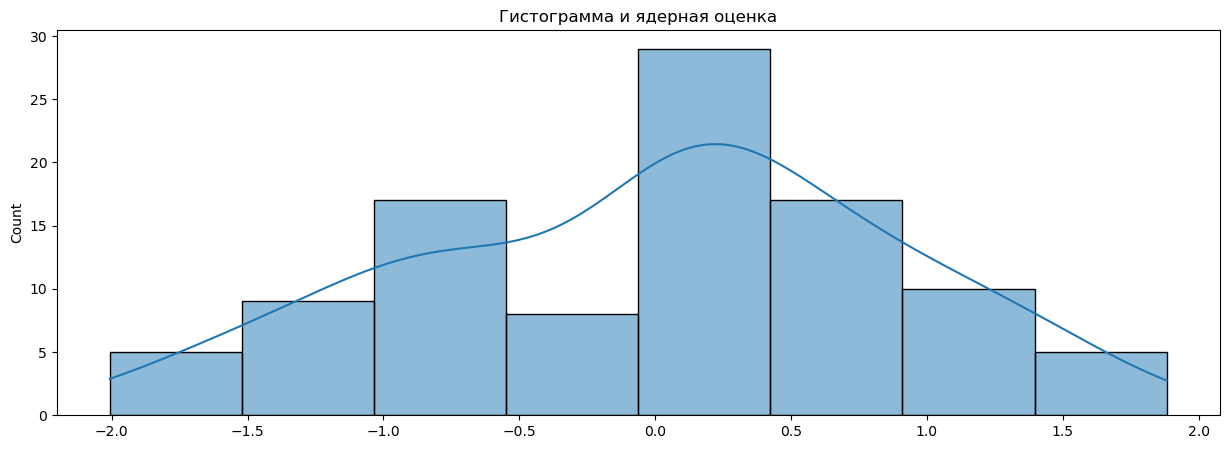

In [115]:
plt.figure(figsize=(15, 5))

plt.title("Гистограмма и ядерная оценка")

sns.histplot(data=sample, kde=True)
plt.show()

## Точечные оценки

Рассмотрим **выборочное среднее**.

$\overline{X}  = \sum\limits_{i=1}^n X_i$

Сгенерируем выборку из $\mathcal{N}(3, 25)$ размера 1000:


In [116]:
size = 1000
sample = sps.norm(loc=3, scale=5).rvs(size=size) #генерируем реализацию выборки из стандартного нормального распределения

Посчитаем выборочное среднее

In [117]:
mean = sample.sum() / size

print("Выборочное среднее:", mean)

Выборочное среднее: 3.093713112528978


Что хорошего может нам дать эта величина?

Давайте посмотрим, как она ведет себя с ростом размера выборки!

Посчитаем выборочное среднее по всем префиксам выборки ($j \in {1, \ldots n}$):

$(\overline{X} )_j = \sum\limits_{i=1}^j X_i$

In [118]:
means = sample.cumsum() / (np.arange(size) + 1)

Построим график зависимости среднего от размера префикса:

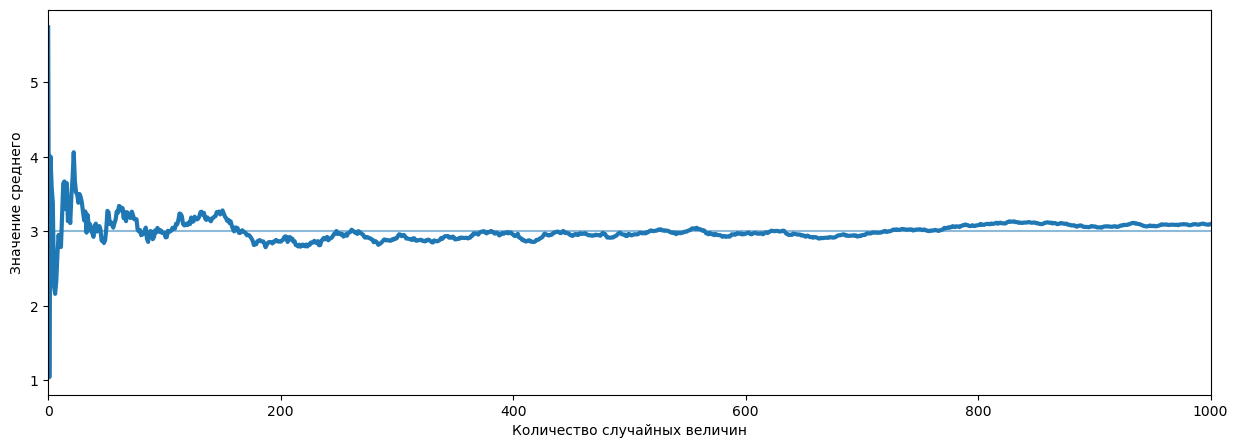

In [119]:
plt.figure(figsize=(15, 5))
plt.plot(means, lw=3)
plt.hlines(3, 0, size, alpha=0.5)
plt.xlabel('Количество случайных величин')
plt.ylabel('Значение среднего')
plt.xlim((0, size));

Но одного эксперимента мало, чтобы понять свойства вероятностных объектов. **Запомните это!**

Повторим эксперимент 10 раз **независимо**.

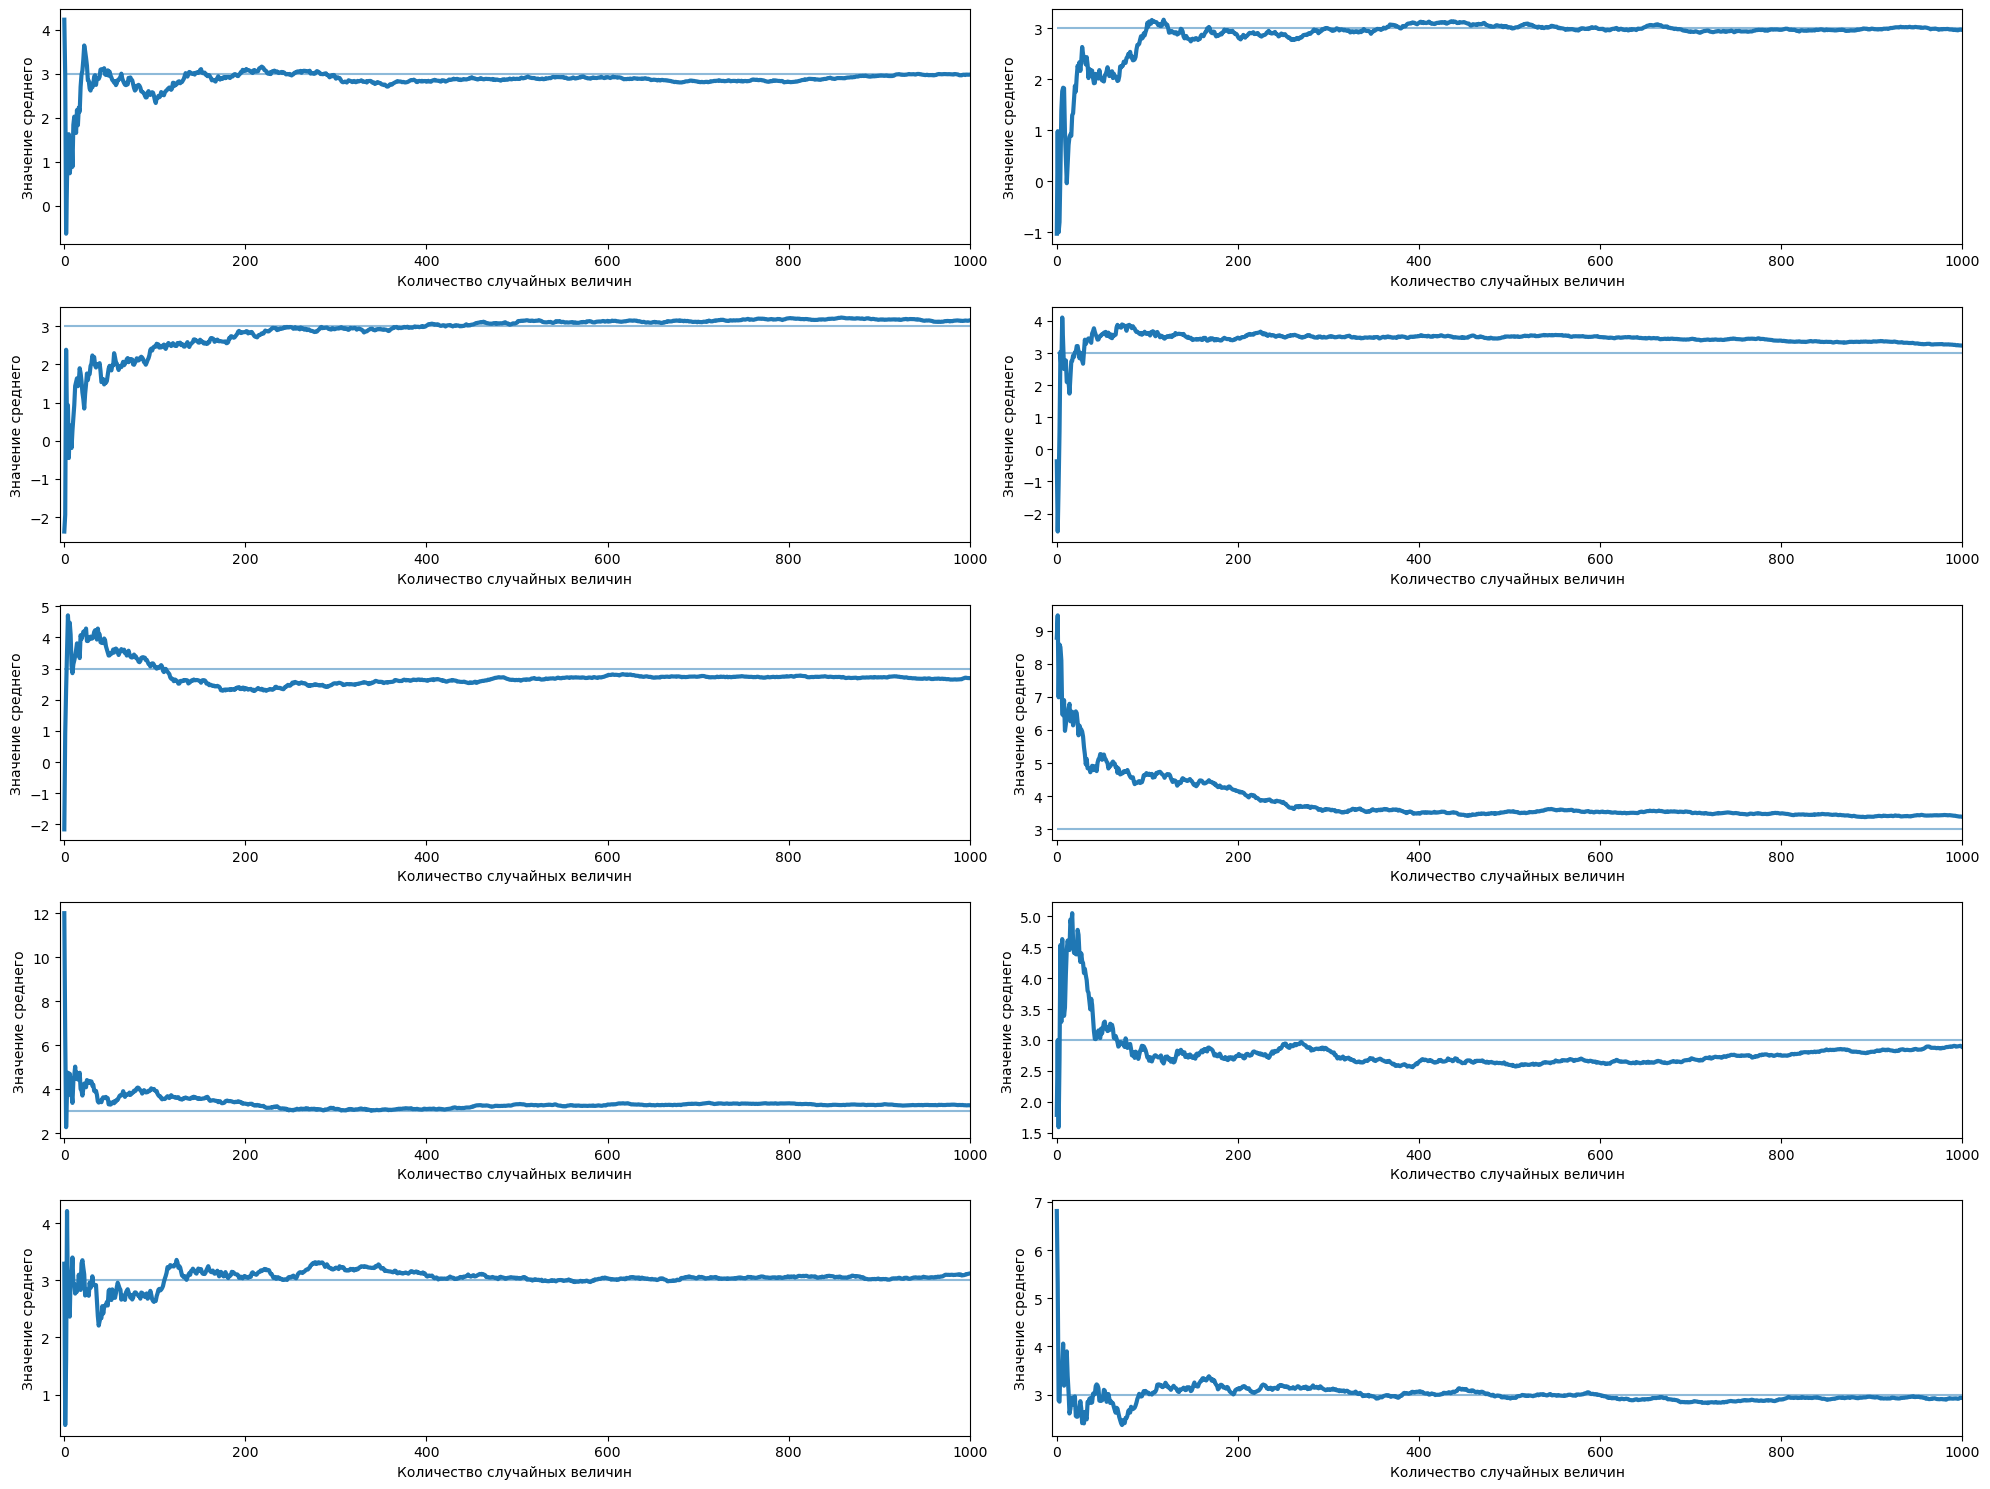

In [120]:
plt.figure(figsize=(20, 15))

for i in range(10):

    # Генерация выборки и вычисление средних
    sample = sps.norm(loc=3, scale=5).rvs(size=size)
    means = sample.cumsum() / (np.arange(size) + 1)
    
    # График
    plt.subplot(5, 2, i+1)
    plt.plot(means, lw=3)
    plt.hlines(3, 0, size, alpha=0.5)
    plt.xlabel('Количество случайных величин')
    plt.ylabel('Значение среднего')
    plt.xlim((-5, size))
    
plt.tight_layout()

Как видим, со временем график среднего приближается к значению параметра $a$ нормального распределения.

Вспомним теорию вероятностей!

## Закон больших чисел

#### Формулировка

Пусть $\xi_1, ..., \xi_n$ &mdash; независимые случайные величины из некоторого распределения, причем $\mathsf{E}\xi_i = a$. Тогда выполнена сходимость $$\frac{\xi_1 + ... + \xi_n}{n} \stackrel{п.н.}{\longrightarrow} a.$$ 

*Замечание 1.* Закон больших чисел имеет несколько формулировок. Данная формулировка часто называется *усиленным законом больших чисел*. В частности, усиленной она является, поскольку в отличии от "простой" версии она не требует условия на дисперсии и утверждает о более сильной сходимости "почти наверное".

*Замечание 2.* Последовательность случайных величин $\xi_1, \xi_2, ...$ сходится почти наверное к случайной величине $\xi$, если $\mathsf{P}\big(\big\{ \omega \in \Omega\:\big|\: \xi_n(\omega) \to \xi(\omega)\big\}\big) = 1$

---

####  Визуализация

Убедимся в справедливости ЗБЧ, сгенерировав набор из случайных величин  $\xi_1, ..., \xi_{1000}$ и посчитав по нему среднее в зависимости от размера набора, то есть величины $S_{n} = \frac{1}{n}\sum\limits_{i=1}^n \xi_i$ для $1 \leqslant n \leqslant 1000$.

Для примера рассмотрим бернуллиевское распределение.







In [121]:
size = 1000
samples_count = 500

sample = sps.bernoulli(p=0.5).rvs(size=(samples_count, size))
means = sample.cumsum(axis=1) / (np.arange(size) + 1)

Нарисуем траектории среднего для всех реализациий на одном графике.

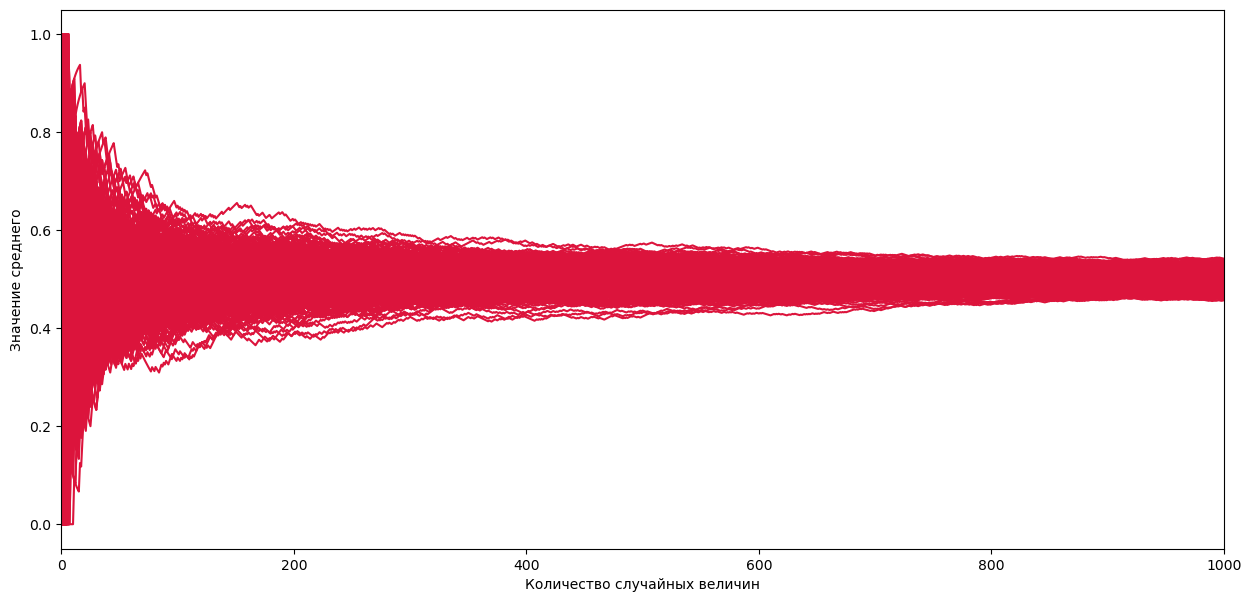

In [122]:
plt.figure(figsize=(15, 7))
for i in range(samples_count):
    plt.plot(np.arange(size) + 1, means[i], color='crimson')
plt.xlabel('Количество случайных величин')
plt.ylabel('Значение среднего')
plt.xlim((0, size));

В подобных "тяжелых" графиках нужно выставлять прозрачность объектов

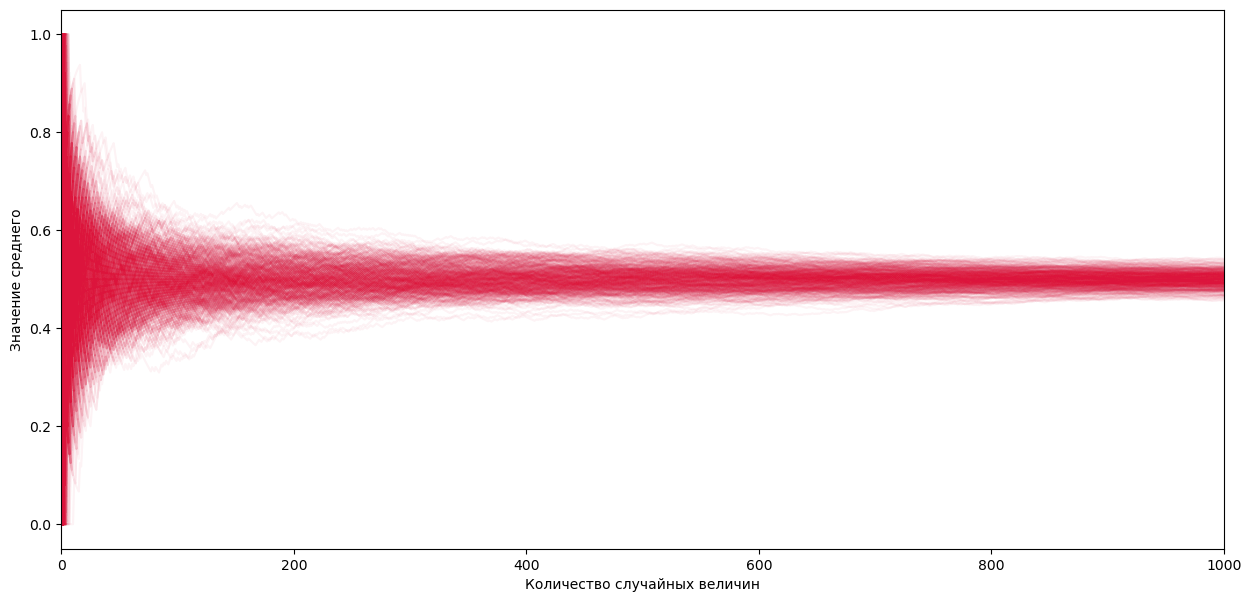

In [123]:
plt.figure(figsize=(15, 7))
for i in range(samples_count):
    plt.plot(np.arange(size) + 1, means[i], color='crimson', alpha=0.05)
plt.xlabel('Количество случайных величин')
plt.ylabel('Значение среднего')
plt.xlim((0, size));

Поставим ее еще меньше

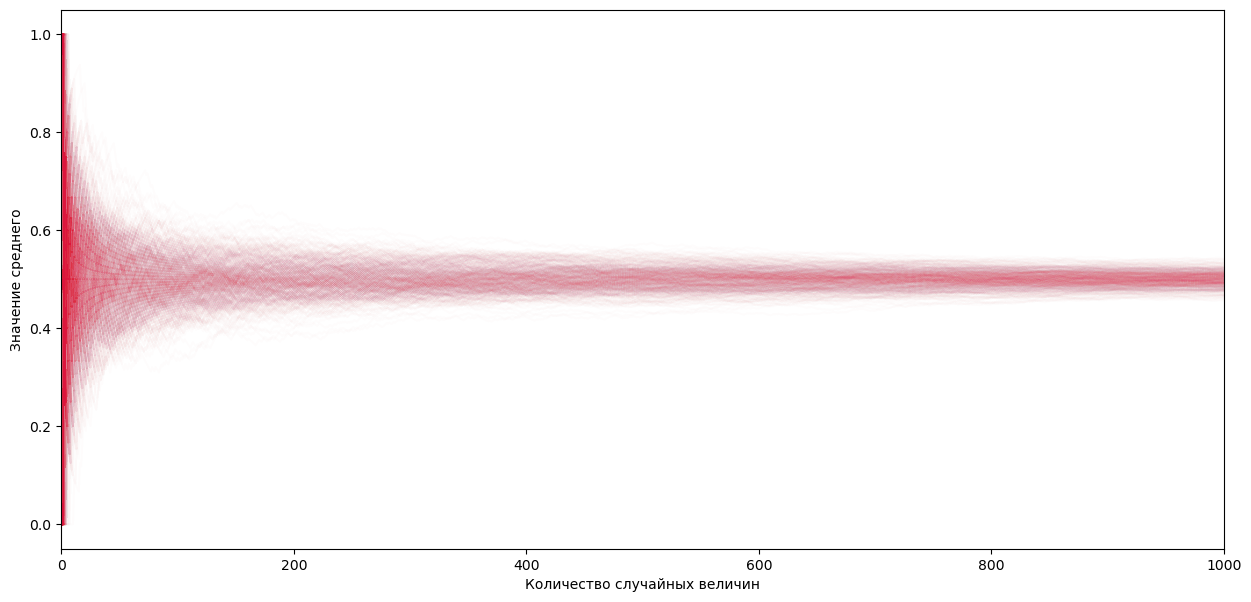

In [124]:
plt.figure(figsize=(15, 7))
for i in range(samples_count):
    plt.plot(np.arange(size) + 1, means[i], color='crimson', alpha=0.01)
plt.xlabel('Количество случайных величин')
plt.ylabel('Значение среднего')
plt.xlim((0, size));

**Вывод:** При достаточность большом количестве случайных величин значение среднего не сильно
отклоняется от математического ожидания, причем чем больше случайных величин просуммированы, тем меньше отклонения. Данный эксперимент хорошо визуализирует закон больших чисел.


Таким образом, в данном случае выборочное среднее -- "хорошая оценка", т.к. с ростом выборки его значение приближается к истинному значению параметра.


Это  эксперимент намекает нам, что некоторые оценки могут быть "хорошими" в каком-лмбо смысле. О том, какие у оценок бывают "хорошие" свойства -- на следующих занятиях!

## Задание 3
Проведите подобный эксперимент для ядерной оценки плотности. 

Сгенерируйте 100 выборок по 1000 элементов из нормального распределения ($\mu$=0, $\sigma$=1). 

In [125]:
size = 100
samples_count = 100
sample = sps.norm.rvs(size=(samples_count, size))
sample.shape

(100, 100)

Отрисуйте их ядерные оценки плотности на одном графике.  На этом же графике отрисуйте плотность искомого распределения

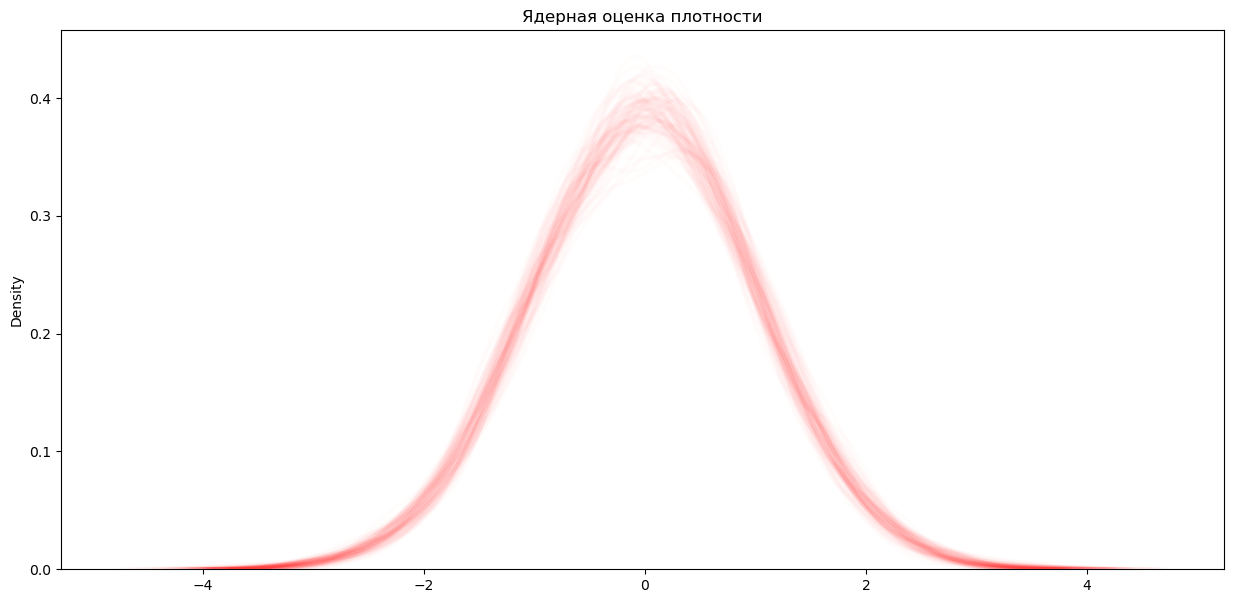

In [144]:
plt.figure(figsize=(15, 7))
plt.title("Ядерная оценка плотности")
for i in range(samples_count):
    sns.kdeplot(data=sample[i], lw=3, color = 'red', alpha = 0.01 )
plt.plot();


Увеличьте размер выборок до 1000 и повторите эксперимент.

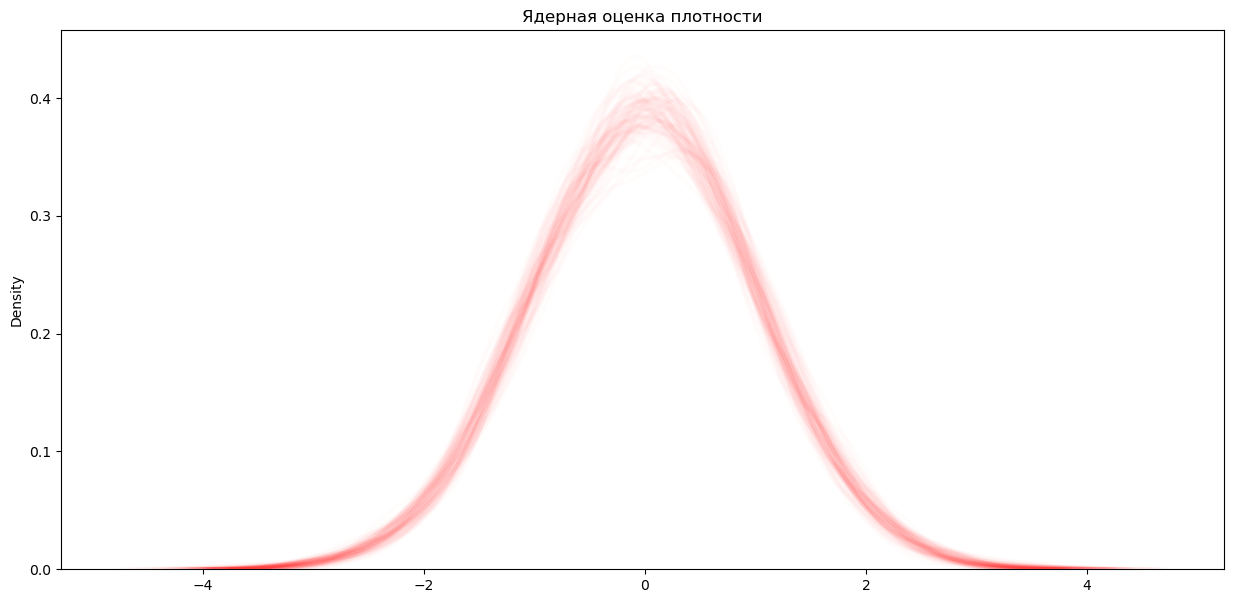

In [141]:
size = 1000
samples_count = 100
sample = sps.norm.rvs(size=(samples_count, size))
plt.figure(figsize=(15, 7))
plt.title("Ядерная оценка плотности")
for i in range(samples_count):
    sns.kdeplot(data=sample[i], lw=3, color = 'red', alpha = 0.01 )
plt.plot();


А теперь наоборот - поставьте размер выборки 100, а кол-во - 1000 и повторите эксперимент.

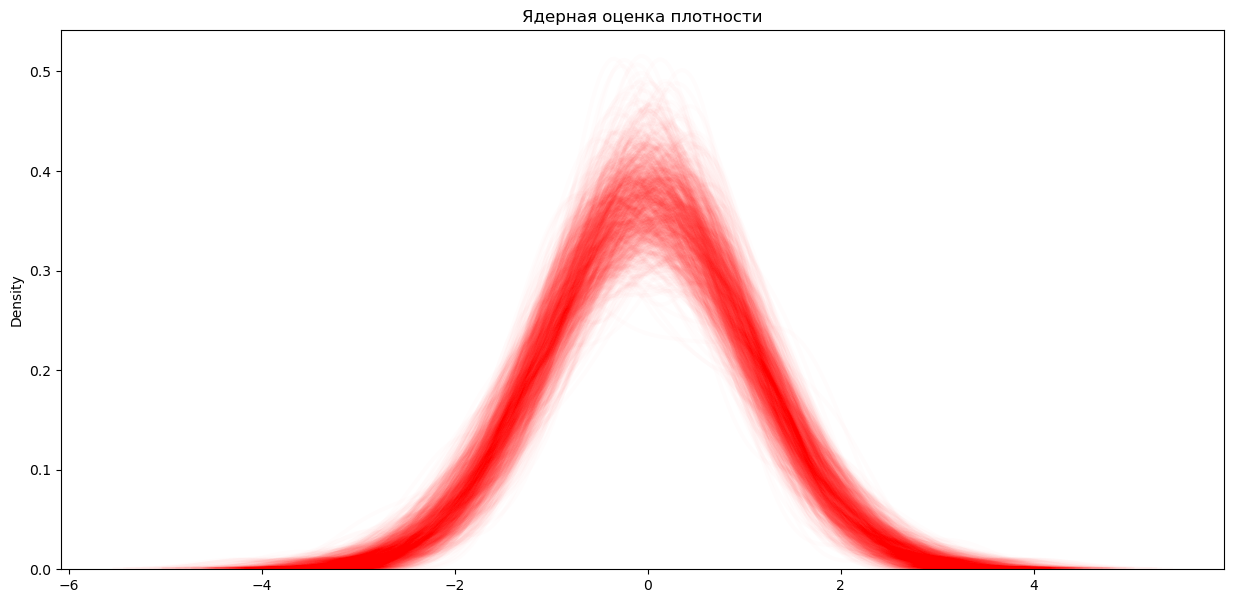

In [140]:
size = 100
samples_count = 1000
sample = sps.norm.rvs(size=(samples_count, size))
plt.figure(figsize=(15, 7))
plt.title("Ядерная оценка плотности")
for i in range(samples_count):
    sns.kdeplot(data=sample[i], lw=3, color = 'red', alpha = 0.01 )
plt.plot();